In [34]:
# Cancer Prediction using Logistic Regression - ANN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [35]:
df= pd.read_csv('tumor.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
df.tail()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4
682,897471,4,8,8,5,4,5,10,4,1,4


In [37]:
df.shape

(683, 11)

In [38]:
df.drop([df.columns[0]], axis= 1, inplace= True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [40]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

<AxesSubplot:>

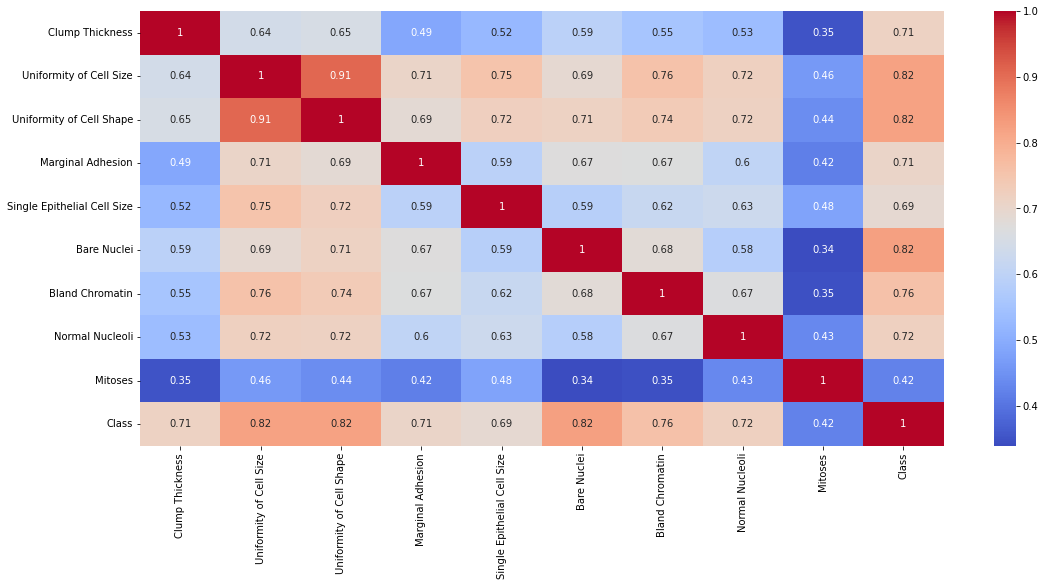

In [41]:
plt.figure(figsize=[18,8])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

In [42]:
df['Class'].loc[df['Class'] == 2] = 0
df['Class'].loc[df['Class'] == 4] = 1

In [43]:
df.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1
682,4,8,8,5,4,5,10,4,1,1


In [44]:
x = df.drop(['Class'],axis=1)
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [45]:
y=df[['Class']]
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [46]:
#Convert dataframe to numpy.

X = x.to_numpy()

Y = y.to_numpy()

In [47]:
#Divide the training and testing set

x_train = x.iloc[:600]

y_train = y.iloc[:600]

x_test = x.iloc[600:]

y_test = y.iloc[600:]

In [48]:
print('X - train shape : ',x_train.shape)
print('Y - train shape : ',y_train.shape)
print('X - test shape : ',x_test.shape)
print('Y - test shape : ',y_test.shape)

X - train shape :  (600, 9)
Y - train shape :  (600, 1)
X - test shape :  (83, 9)
Y - test shape :  (83, 1)


In [49]:
x_train = x_train.to_numpy()

y_train = y_train.to_numpy()

x_test = x_test.to_numpy()

y_test = y_test.to_numpy()

In [50]:
#Reshaping the numpy array.

x_train = x_train.reshape(x_train.shape[0],-1).T
x_test = x_test.reshape(x_test.shape[0],-1).T
y_train = y_train.reshape(y_train.shape[0],-1).T
y_test = y_test.reshape(y_test.shape[0],-1).T
#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9, 600)
(1, 600)
(9, 83)
(1, 83)


In [52]:
#Resizing the array

x_train = x_train/10
x_test = x_test/10

In [53]:
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

# ITS TIME TO BUILD THE MODEL !!!!!!! 

In [54]:
# Simple 3 layer model

In [55]:
def layer_sizes(x_train,y_train):
    
    n_x = x_train.shape[0]
    n_h = 4
    n_y = y_train.shape[0]
    
    return (n_x,n_h,n_y)

print(layer_sizes(x_train,y_train))

(9, 4, 1)


In [56]:
def initialize_parameters(n_x,n_h,n_y):
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters

#print(initialize_parameters(9,4,1))

In [57]:
def sigmoid(z):
    
    s = 1 / (1 + np.exp(-z))
    
    return s

In [58]:
def forward_propagation(x_train,parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,x_train) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, x_train.shape[1]))
    
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

In [59]:
def compute_cost(A2,y_train):
    
    m = y_train.shape[1]
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = - np.sum(logprobs) / m
        
    cost = float(np.squeeze(cost)) 
    
    return cost

In [60]:
def backward_propagation(parameters,cache,x_train,y_train):
    
    m = x_train.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']  
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - y_train
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis = 1,keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2), 1-np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1, x_train.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
        
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}
    
    return grads

In [61]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [62]:
def nn_model(x_train,y_train, n_h, num_iterations):
    
    np.random.seed(3)
    n_x = layer_sizes(x_train, y_train)[0]
    n_y = layer_sizes(x_train, y_train)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    

    for i in range(0, num_iterations):
        A2,cache = forward_propagation(x_train,parameters)
        cost = compute_cost(A2,y_train)
        grads = backward_propagation(parameters,cache,x_train,y_train)
        parameters = update_parameters(parameters,grads,learning_rate = 0.01)
        
    return parameters

In [63]:
def predict(parameters, X):
    
    A2,cache = forward_propagation(X,parameters)
    predictions = (A2>0.5)
    
    return predictions

In [64]:
lr_model = nn_model(x_train, y_train, 4, num_iterations=10000)

In [65]:
print("W1 = " + str(lr_model["W1"]))
print("b1 = " + str(lr_model["b1"]))
print("W2 = " + str(lr_model["W2"]))
print("b2 = " + str(lr_model["b2"]))

W1 = [[-0.60168901 -0.47138515 -0.52341424 -0.36698884 -0.17858518 -0.74786709
  -0.33741222 -0.38973083 -0.23993889]
 [-0.57034424 -0.44917094 -0.47441109 -0.31992157 -0.14216231 -0.68327954
  -0.31678803 -0.35920055 -0.23634544]
 [ 0.33617179  0.24561837  0.27450646  0.20643896  0.11020553  0.4014352
   0.18524414  0.20789507  0.13959396]
 [-0.58867516 -0.45998753 -0.5019492  -0.33053035 -0.14630507 -0.71902711
  -0.32793728 -0.37359423 -0.2517909 ]]
b1 = [[ 1.15276385]
 [ 1.09246877]
 [-0.64308249]
 [ 1.12291017]]
W2 = [[-2.04731351 -1.90158423  1.08556875 -1.97549656]]
b2 = [[-1.32817452]]


# Testing the model

In [66]:
params = {'W1' : lr_model['W1'], 'b1' : lr_model['b1'], 'W2' : lr_model['W2'], 'b2' : lr_model['b2']}

Y_prediction_test = predict(params, x_test)
Y_prediction_train = predict(params, x_train)

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

train accuracy: 96.83333333333333 %
test accuracy: 100.0 %


# Asking User Inputs on a Built Model

In [72]:
def user_inp():
    
    params = {'W1' : lr_model['W1'], 'b1' : lr_model['b1'], 'W2' : lr_model['W2'], 'b2' : lr_model['b2']}
    
    heads = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',' Single Epitelial Cell Size','Bare Nuceli','Bland Chromatin','Normal Nuclei','Mitoses']
    A = []
    for i in heads : 
        a = int(input('Enter the '+i+' :'))
        if a>=0 and a<=10:
            A.append(a)
        else:
            print('Enter the value within 0 to 10 !!!')
            user_inp()


    val = np.array(A)
    vals = val.reshape((1,9)).T
    vals = vals/10

    pred_val = predict(params,vals)
    
    if pred_val == False:
        print('Cancer = Benign')
    else:
        print('Cancer = Malignant')

    #print(pred_val[0])
    
    #return val,pred_val

user_inp()

Enter the Clump Thickness :4
Enter the Uniformity of Cell Size :1
Enter the Uniformity of Cell Shape :1
Enter the Marginal Adhesion :3
Enter the  Single Epitelial Cell Size :2
Enter the Bare Nuceli :1
Enter the Bland Chromatin :3
Enter the Normal Nuclei :1
Enter the Mitoses :1
Cancer = Benign
